<a href="https://colab.research.google.com/github/wenchun0731/github-colab/blob/main/crosswalk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import cv2
image=cv2.imread('/content/drive/MyDrive/Finetune/Licence_Finetune/FrameOutput/frame_0570.jpg')
image2=image.copy()


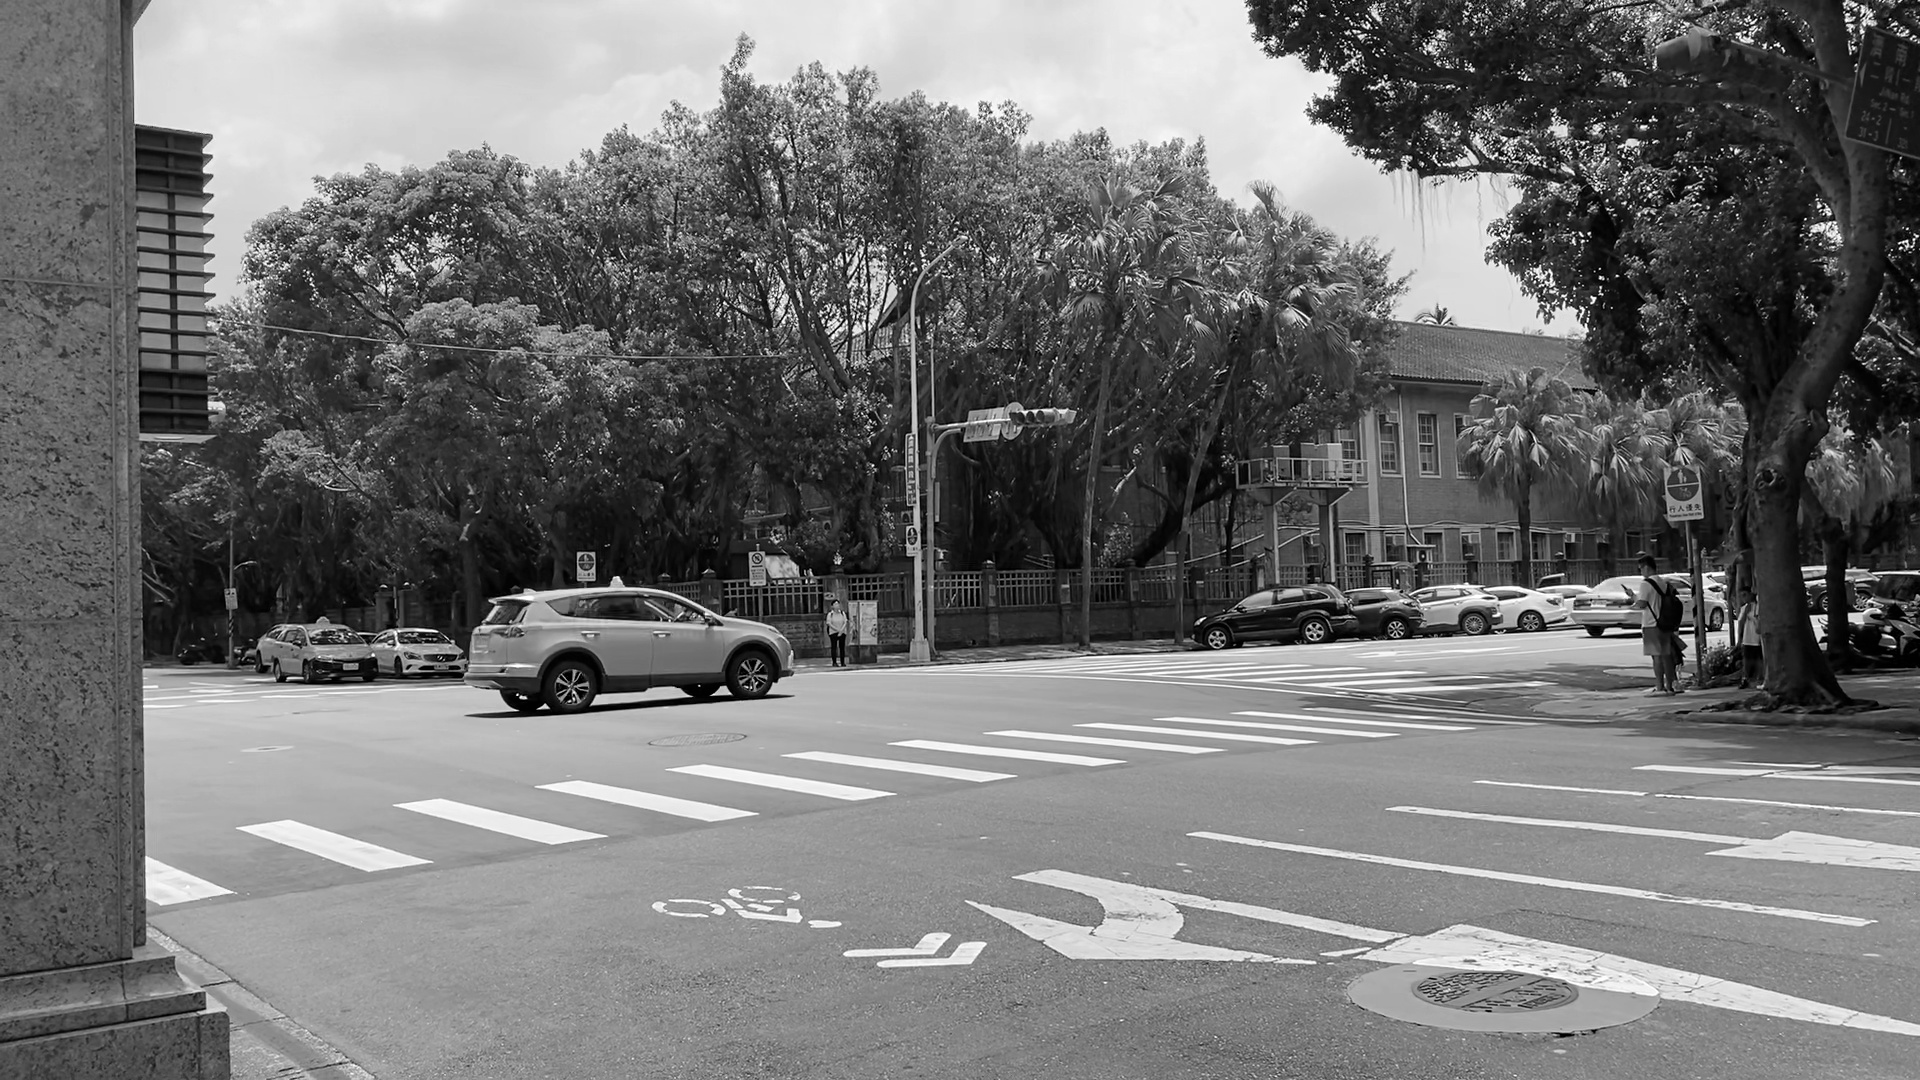

In [4]:
gray_img = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
from google.colab.patches import cv2_imshow
cv2_imshow(gray_img)


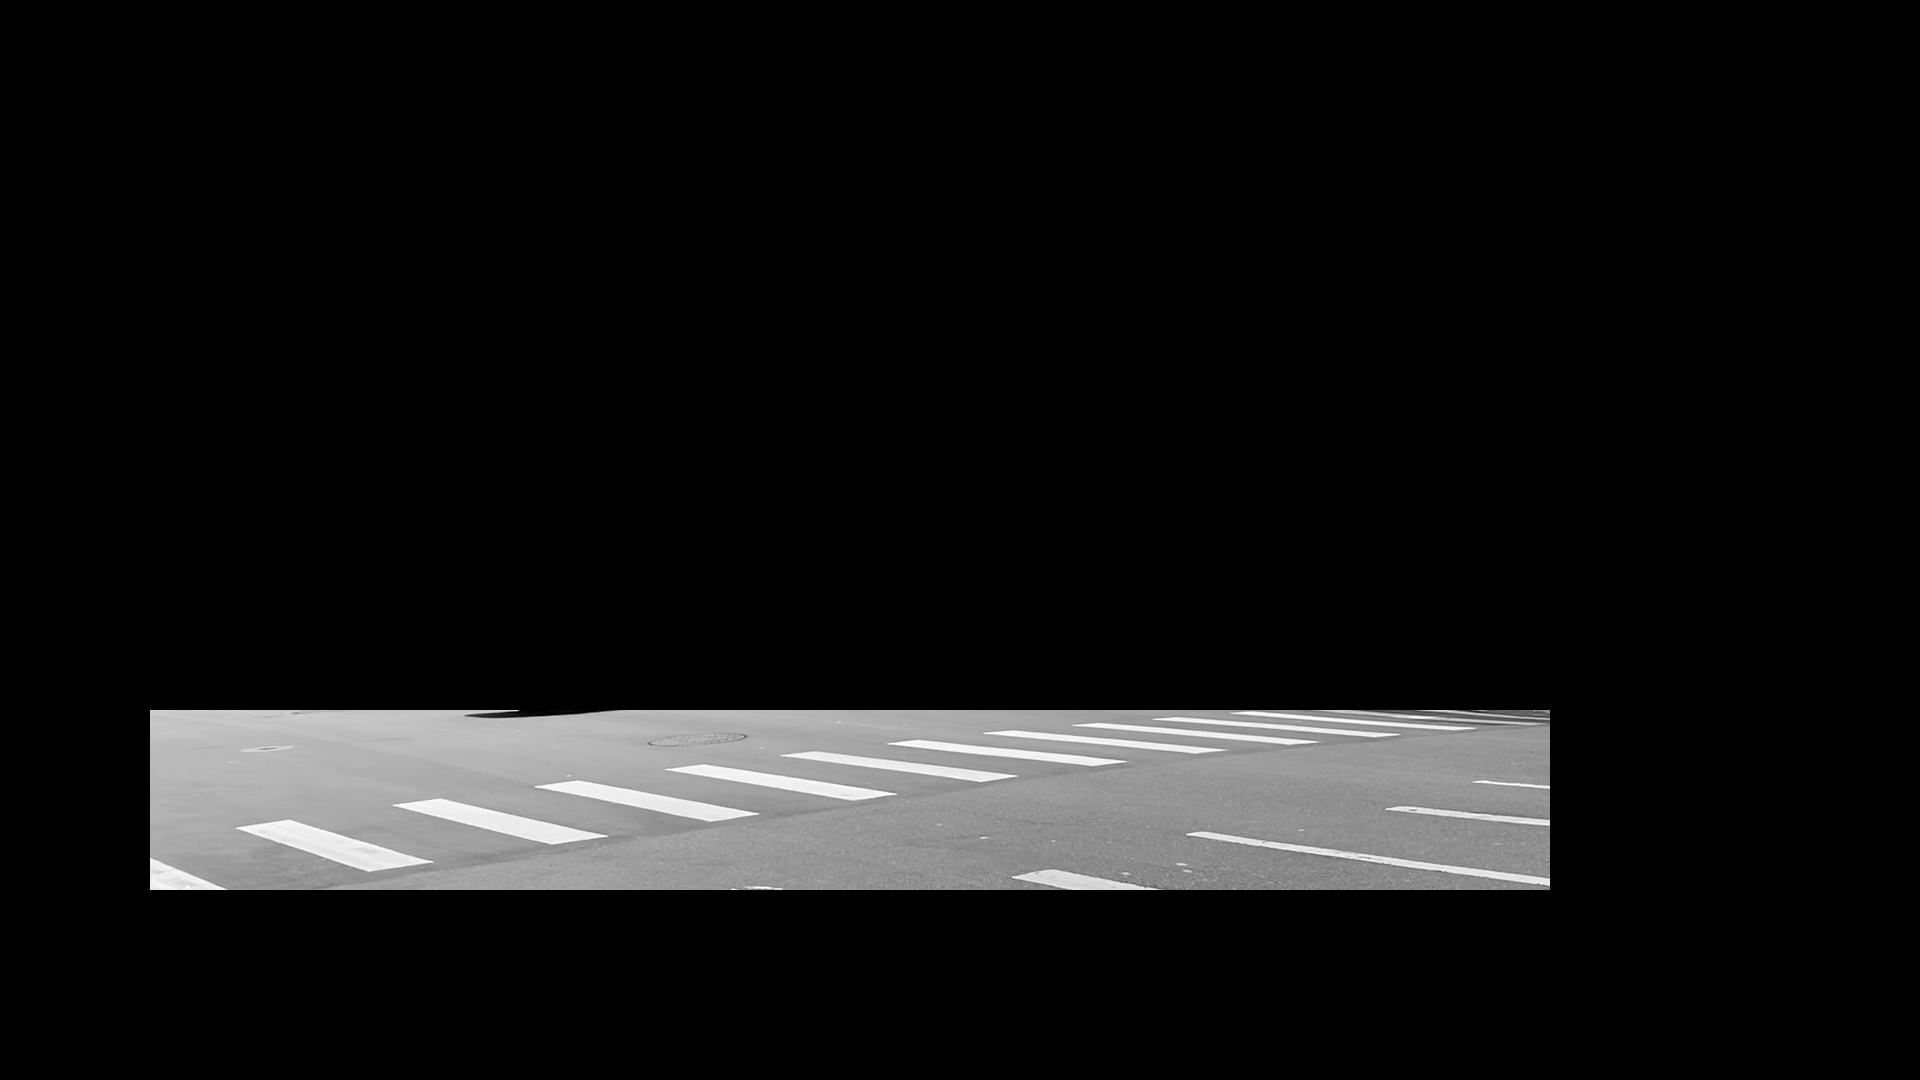

In [5]:
import numpy as np

mask=np.ones_like(gray_img)*0
h,w=mask.shape[0:]
# print(h,w)
mask[h//2+170:h//2+350,150:150+1400]=255
mask_edges=cv2.bitwise_and(gray_img,mask)
cv2_imshow(mask_edges)


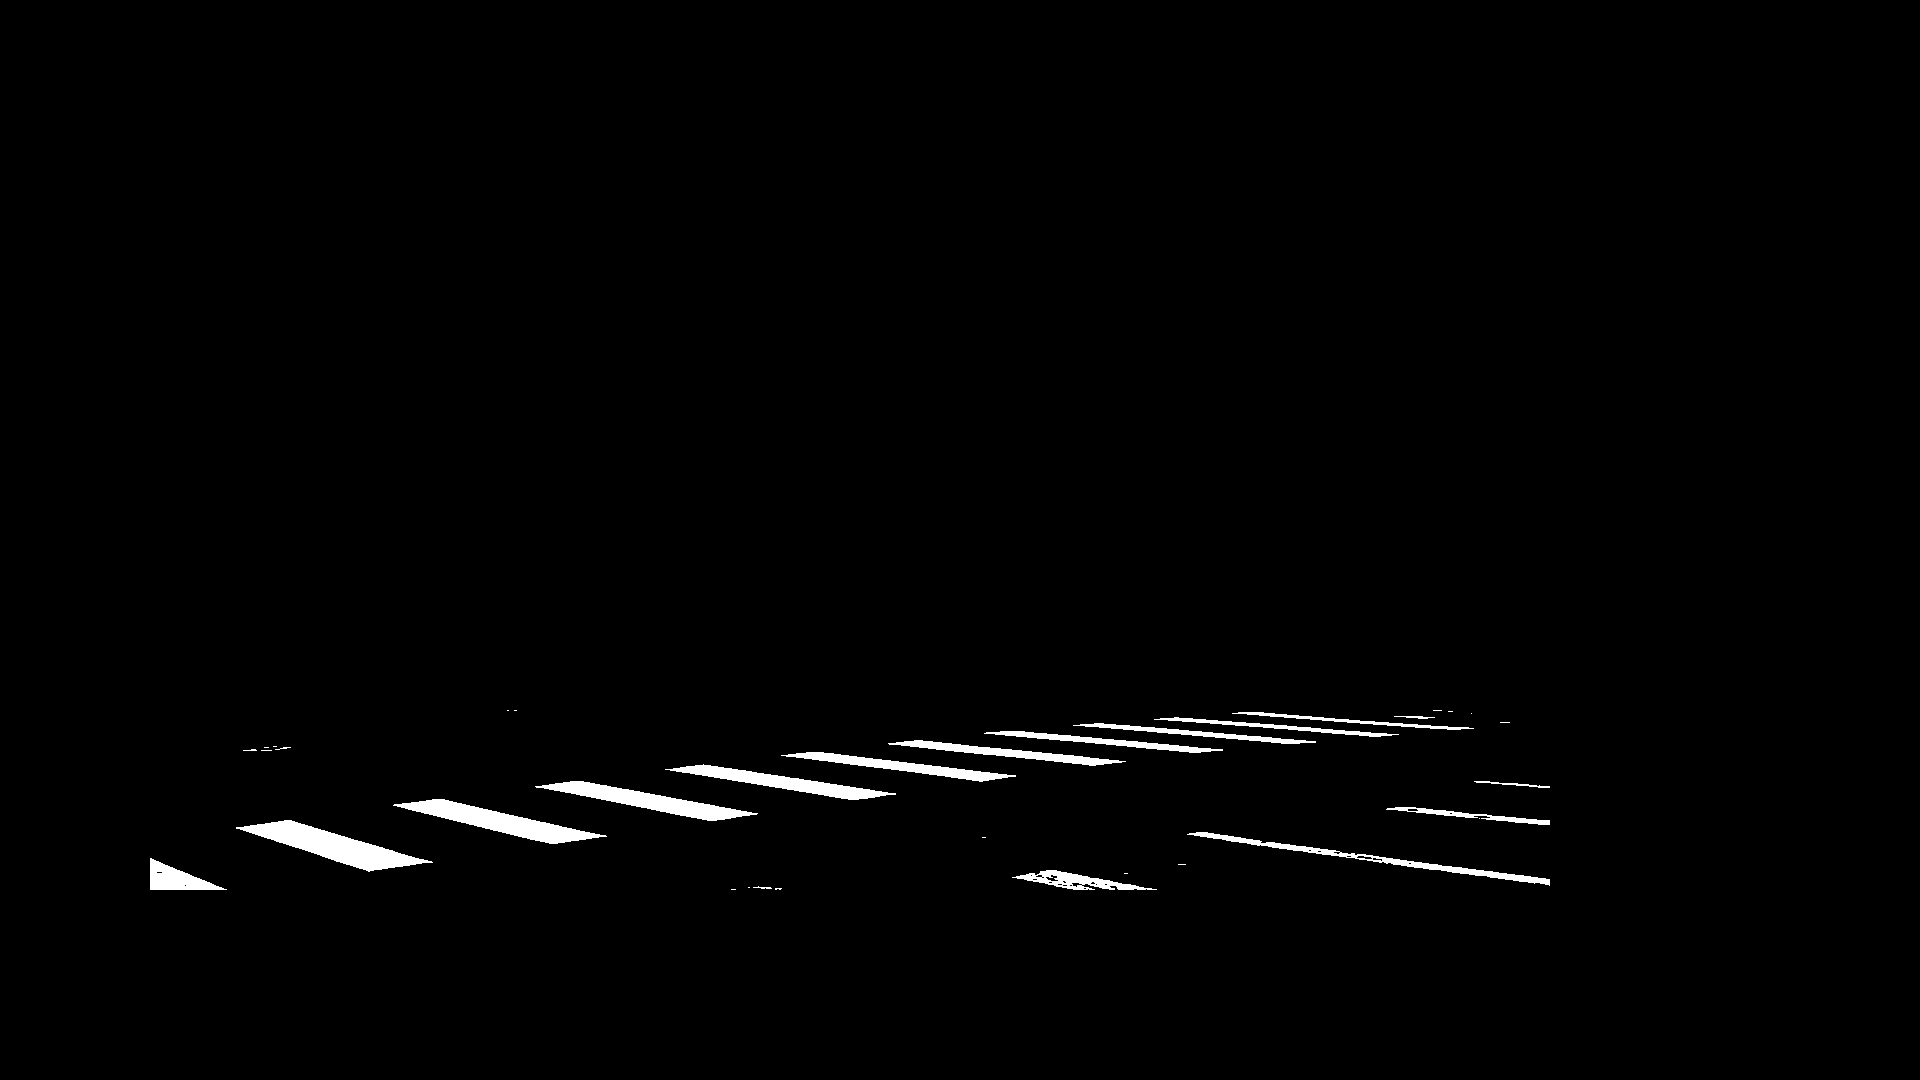

In [6]:
threshold_value = 210  # 可以根據需要調整
max_value = 255
_, binary_image = cv2.threshold(mask_edges, threshold_value, max_value, cv2.THRESH_BINARY)
cv2_imshow(binary_image)


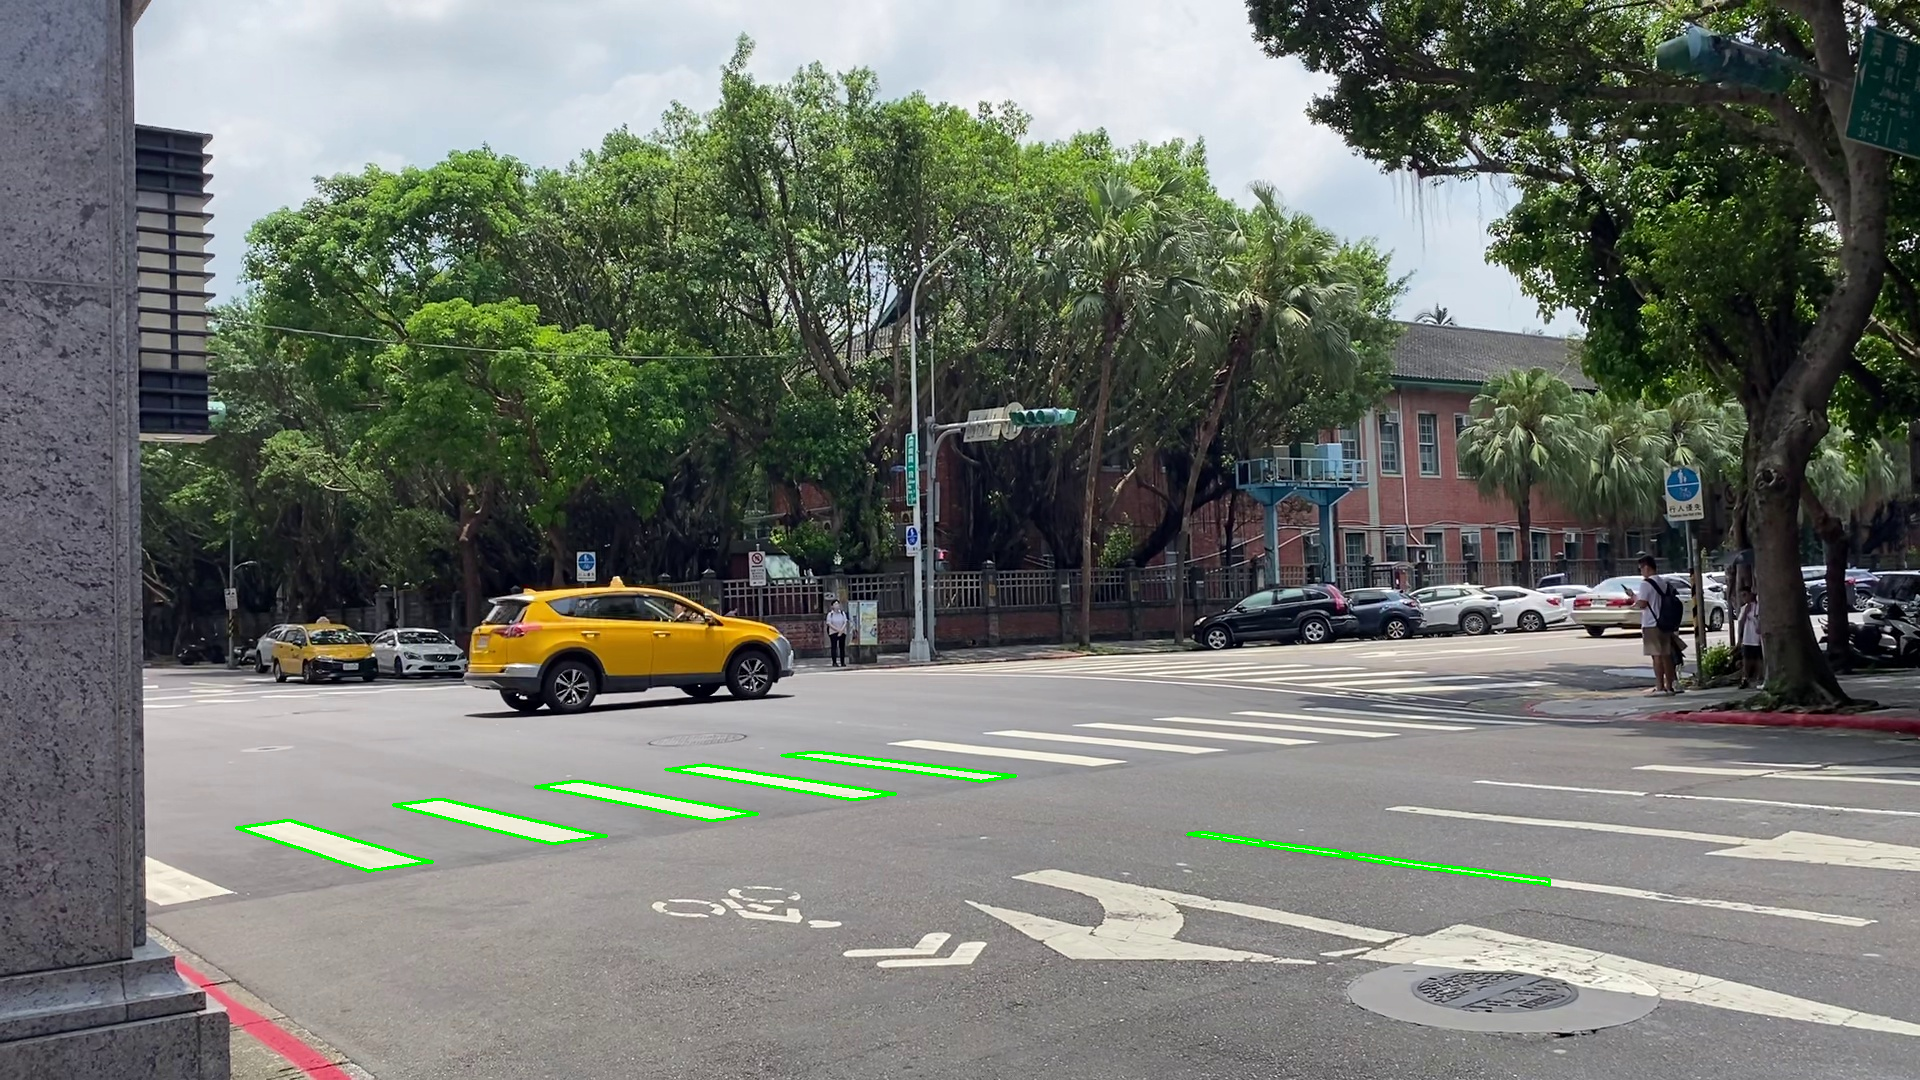

In [7]:
contours, hierarchy = cv2.findContours(binary_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)


contour_all=[]

for contour in contours:
  area=cv2.contourArea(contour)
  if area>1500:
    contour_all.append(contour)

cv2.drawContours(image, contour_all, -1, (0, 255, 0), 2)
# # 繪製輪廓
# if contour_all and len(contour_all) > 0:
#     cv2.drawContours(image, contour_all, -1, (0, 255, 0), 2)
# else:
#     print('沒有輪廓!!')
cv2_imshow(image)
image=image2.copy()


moments圖像矩:計算圖像的特徵量

M[m00]面積

M[m01]一階矩

1380 859
332 845
498 821
647 800
782 782
902 766


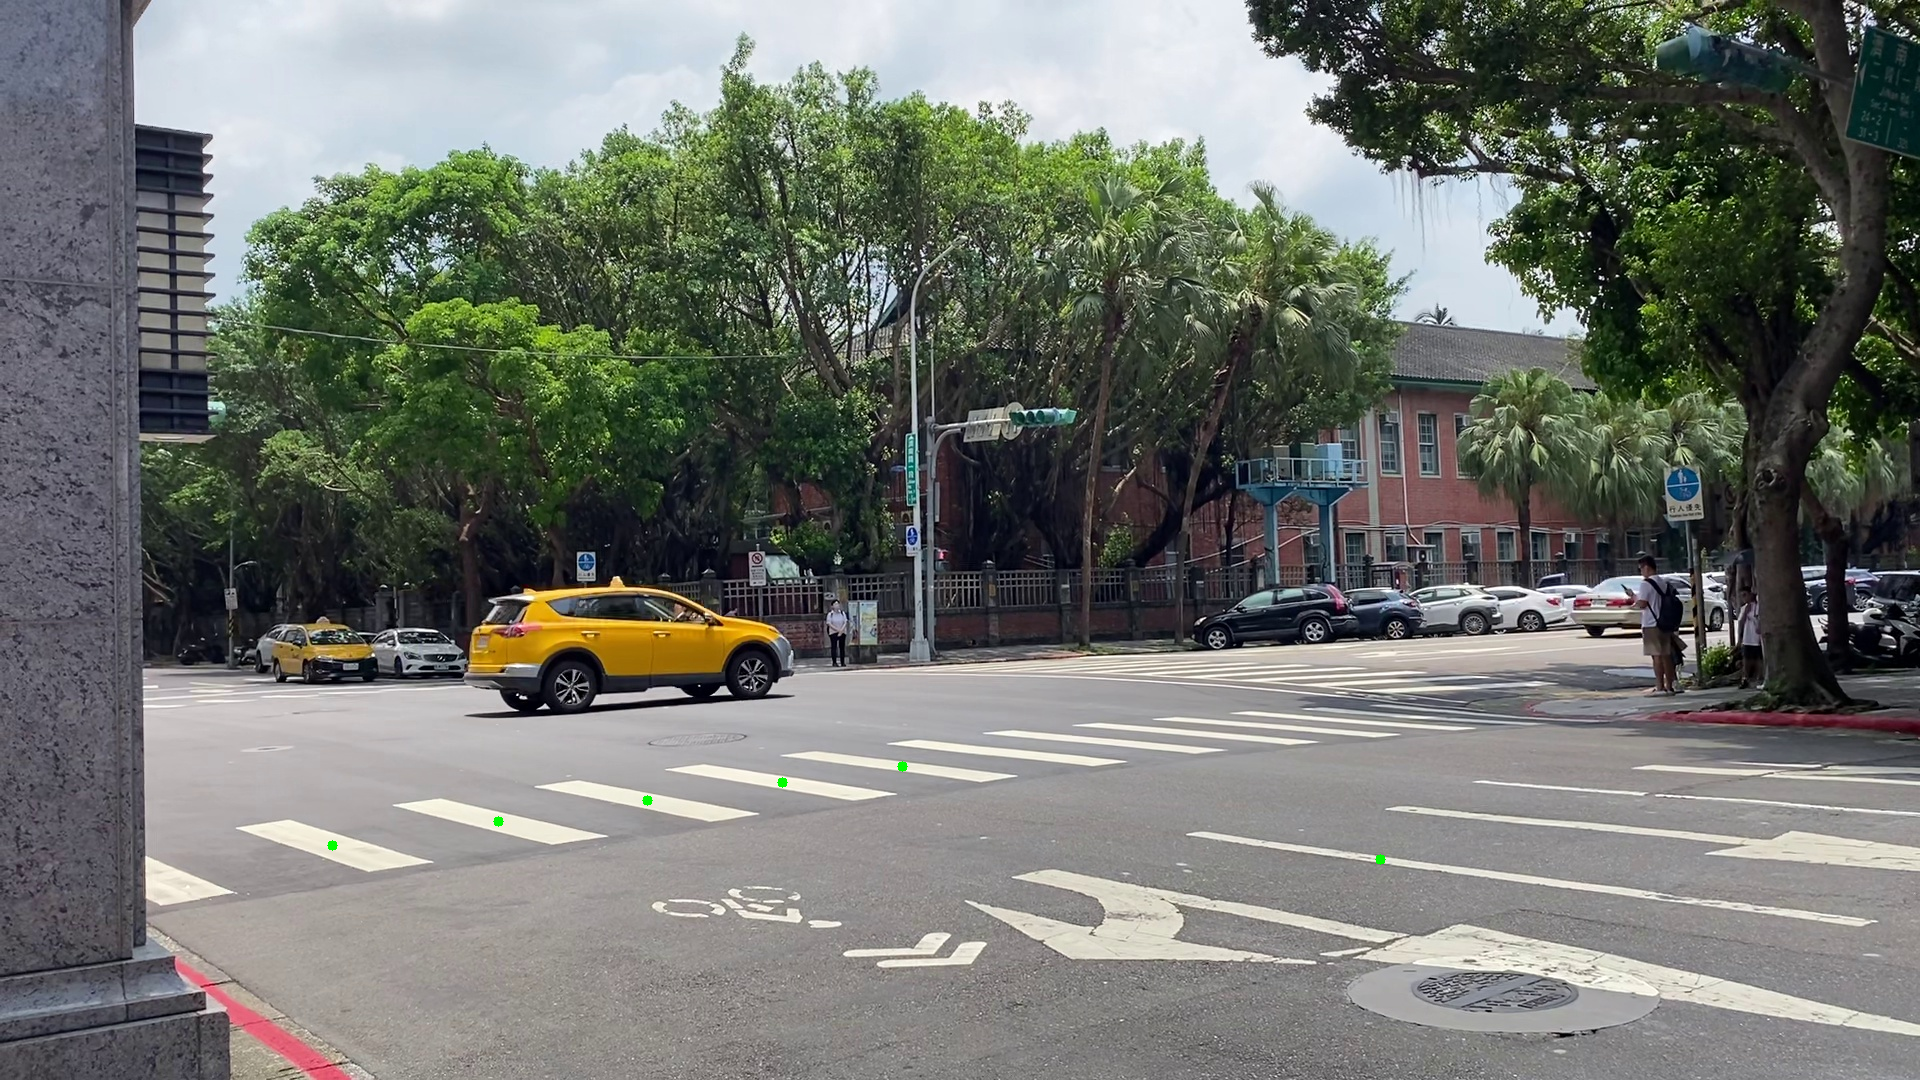

In [9]:
for contour in contour_all:
    M = cv2.moments(contour)
    if M['m00'] != 0:
        cx = int(M['m10'] / M['m00'])
        cy = int(M['m01'] / M['m00'])
        print(cx,cy)
    else:
        cx, cy = 0, 0

    # 在圖像上標記中心點
    cv2.circle(image, (cx, cy), 5, (0, 255, 0), -1)
cv2_imshow(image)